### Importing libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

### Importing and loading iris dataset

In [63]:
from sklearn.datasets import load_iris
iris = load_iris()

### Preparing Iris Data

In [64]:
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
target_df

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [83]:
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


### Overview of Iris Data

In [69]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
iris_df.shape

(150, 5)

### Visualisation of Iris Data

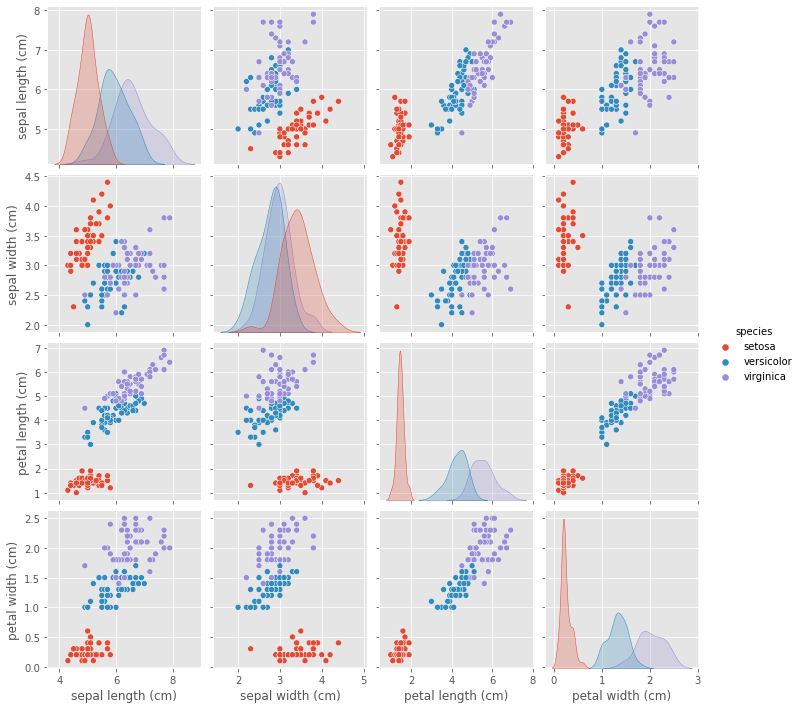

In [72]:
plt.style.use('ggplot')
sns.pairplot(iris_df, hue= 'species')

### Predicting sepal length

In [73]:
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)
# Variables 
X= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_df['sepal length (cm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

In [74]:
X_train.shape

(100, 4)

In [75]:
X_test.shape

(50, 4)

# Using Linear Regression

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
lr.predict(X_test)

array([5.46114587, 5.07345452, 4.9347765 , 6.99564965, 6.54274665,
       5.98101314, 5.68344523, 5.47200924, 5.87249006, 4.687635  ,
       6.2935498 , 5.53302753, 4.90789461, 7.34015348, 6.17439086,
       6.09386911, 6.00159206, 6.01550096, 4.73818534, 6.6970219 ,
       5.49567769, 5.21721782, 6.03683228, 6.24318298, 6.09386911,
       5.5452921 , 5.09735047, 5.85437218, 4.84437129, 4.10007944,
       6.64781317, 5.60092772, 6.64459972, 5.7094508 , 6.47068148,
       6.18614616, 6.42031467, 5.96401471, 5.88658249, 6.82494485,
       5.10127233, 4.76091786, 4.97328977, 6.47501437, 6.19911914,
       4.51050332, 6.78415406, 5.98213258, 4.83046239, 4.93319177])

### Evaluating Model's Performance

In [78]:
pred = lr.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.25955709755630363
Mean Squared Error: 0.1017452956423896
Mean Root Squared Error: 0.3189753840696639


### Testing

In [79]:
iris_df.loc[6]

sepal length (cm)    4.6
sepal width (cm)     3.4
petal length (cm)    1.4
petal width (cm)     0.3
species              0.0
Name: 6, dtype: float64

In [80]:
d = {'sepal length (cm)' : [4.6],
    'sepal width (cm)' : [3.4],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.3],
    'species' : 0}
test_df = pd.DataFrame(data=d)
test_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,4.6,3.4,1.4,0.3,0


In [81]:
X_test = test_df.drop('sepal length (cm)', axis= 1)
y_test = test_df['sepal length (cm)']

lr.predict(X_test)

array([4.88749921])

In [82]:
pred = lr.predict(X_test)

print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

Predicted Sepal Length (cm): 4.887499211502659
Actual Sepal Length (cm): 4.6


### End of Linear Regression